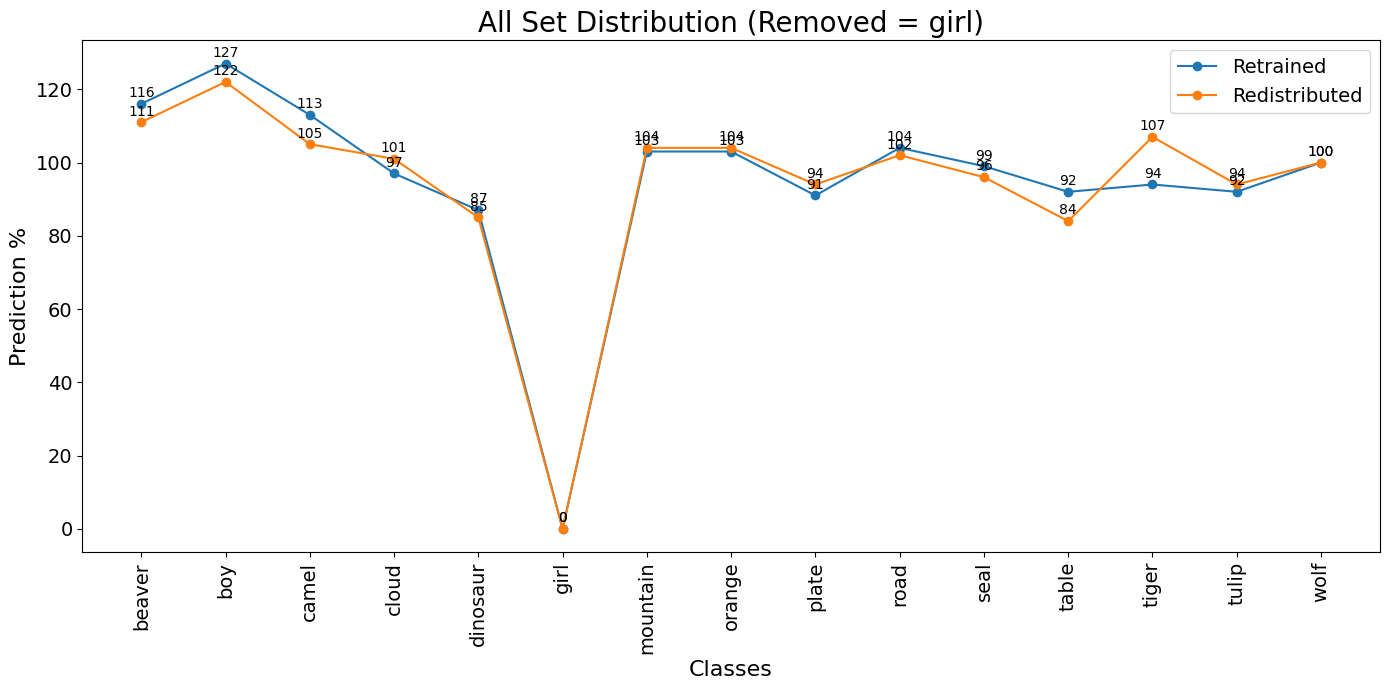

    Class Index Class Name  Retrained Count  Redistributed Count
4             4     beaver              116                  111
11           11        boy              127                  122
15           15      camel              113                  105
23           23      cloud               97                  101
29           29   dinosaur               87                   85
35           35       girl                0                    0
49           49   mountain              103                  104
53           53     orange              103                  104
61           61      plate               91                   94
68           68       road              104                  102
72           72       seal               99                   96
84           84      table               92                   84
88           88      tiger               94                  107
92           92      tulip               92                   94
97           97       wol

In [2]:
from lib.utils import model_results_from_npz, compare_results_cifar100, ResultVersion

CIFAR100_CLASSES = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 
    'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 
    'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 
    'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 
    'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 
    'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 
    'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 
    'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
    'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
    ]
NUM_CLASSES = len(CIFAR100_CLASSES)

SEED = 969
EPOCHS = 50
REMOVED_CLASS = 35
MODEL_NAME = "resnet18" # or "wideresnet" 

#model_ori = model_results_from_npz(f"../results/cifar100/cifar100_resnet18_s{SEED}_e{EPOCHS}.npz", NUM_CLASSES)
model_retrain = model_results_from_npz(f"../results/cifar100/cifar100_resnet18_s{SEED}_e{EPOCHS}_r{REMOVED_CLASS}.npz", NUM_CLASSES)
model_redis = model_results_from_npz(f"../results/redis_cifar100/cifar_resnet_s{SEED}_e{EPOCHS}_rd{REMOVED_CLASS}.npz", NUM_CLASSES)

#ori_version = ResultVersion(model_ori, "Original")
retrain_version = ResultVersion(model_retrain, "Retrained")
redis_version = ResultVersion(model_redis, "Redistributed")

compare_mode = "all"

out_csv = f"../analytics/CIFAR100/charts/{compare_mode}_comparison_s{SEED}_e{EPOCHS}_r{REMOVED_CLASS}.csv"
out_png = f"../analytics/CIFAR100/charts/{compare_mode}_comparison_s{SEED}_e{EPOCHS}_r{REMOVED_CLASS}.png"

df_summary = compare_results_cifar100(
    classes=CIFAR100_CLASSES,
    #results=[ori_version, retrain_version, redis_version],
    results=[retrain_version, redis_version],
    removed_idx=REMOVED_CLASS,
    selected_classes=[4, 11, 15, 23, 29, 35, 49, 53, 61, 68, 72, 84, 88, 92, 97],
    seed=SEED,
    mode=compare_mode,
    out_csv=out_csv,
    out_png=out_png,
)

print(df_summary)